Thinking1：为什么股票预测问题容易出现过拟合，也就是在训练时结果很好，在真实环境中结果没那么好
答：金融市场是一个复杂的系统，股票高低的影响因素非常多，例如战争、疫情、天灾等等，这些难以预测的因素都会影响到金融市场的稳定，从而影响股价的走势，而时间序列模型考察的只是时间维度对股价的影响，就算通过训练模型能够达到很好的拟合效果，在不引入其他影响因素的情况下（事实上，刚刚说的几个例子在真实环境中几乎无法预测）很难预测真实的股价。
Thinking2：Prophet与ARMA/ARIMA相比，优势在哪些地方
答：1.Prophet与ARMA/ARIMA相比，更容易拟合非线性的周期趋势，而后面两个模型更容易处理线性的周期趋势。2.Prophet模型中如果存在某些值丢失的问题，也仍然可以做预测，但是ARMA/ARIMA则需要进行插值补全才能进行进一步的拟合和预测，Prophet不用插值，则不会有插值不准确而对模型拟合产生影响的问题。3.Prophet相对于后面两种模型引入了更丰富的数据处理的周期性选择，包括yearly,weekly,daily,使得能够更全面的去发现数据在不同周期下所存在的周期性规律，同时Prophet还引入了holidays这个影响因子，通过对holidays的设置，让模型能够更好的处理节日对数据的影响，从而更好的拟合模型。

In [138]:
import pandas as pd
from fbprophet import Prophet

In [139]:
train_data=pd.read_csv('./train.csv')
print(type(train_data))
print(train_data.head())
print(train_data.tail())

<class 'pandas.core.frame.DataFrame'>
   ID          Datetime  Count
0   0  25-08-2012 00:00      8
1   1  25-08-2012 01:00      2
2   2  25-08-2012 02:00      6
3   3  25-08-2012 03:00      2
4   4  25-08-2012 04:00      2
          ID          Datetime  Count
18283  18283  25-09-2014 19:00    868
18284  18284  25-09-2014 20:00    732
18285  18285  25-09-2014 21:00    702
18286  18286  25-09-2014 22:00    580
18287  18287  25-09-2014 23:00    534


In [140]:
train_data['Datetime']=pd.to_datetime(train_data['Datetime'],format='%d-%m-%Y %H:%M')
print(train_data.head())
print(min(train_data['Datetime']))

   ID            Datetime  Count
0   0 2012-08-25 00:00:00      8
1   1 2012-08-25 01:00:00      2
2   2 2012-08-25 02:00:00      6
3   3 2012-08-25 03:00:00      2
4   4 2012-08-25 04:00:00      2
2012-08-25 00:00:00


In [141]:
train_data.index=train_data['Datetime']
print(train_data.head())

                     ID            Datetime  Count
Datetime                                          
2012-08-25 00:00:00   0 2012-08-25 00:00:00      8
2012-08-25 01:00:00   1 2012-08-25 01:00:00      2
2012-08-25 02:00:00   2 2012-08-25 02:00:00      6
2012-08-25 03:00:00   3 2012-08-25 03:00:00      2
2012-08-25 04:00:00   4 2012-08-25 04:00:00      2


In [142]:
import numpy as np
from datetime import datetime
#print(train_data)
#取出2012年8月到2014年8月的数据
end_day=datetime(2014,9,1,0,0,0)
con2=train_data['Datetime']<end_day
train_data=train_data[con2]
print(train_data)
train_data.drop(['ID','Datetime'],axis=1,inplace=True)
print(train_data)

                        ID            Datetime  Count
Datetime                                             
2012-08-25 00:00:00      0 2012-08-25 00:00:00      8
2012-08-25 01:00:00      1 2012-08-25 01:00:00      2
2012-08-25 02:00:00      2 2012-08-25 02:00:00      6
2012-08-25 03:00:00      3 2012-08-25 03:00:00      2
2012-08-25 04:00:00      4 2012-08-25 04:00:00      2
...                    ...                 ...    ...
2014-08-31 19:00:00  17683 2014-08-31 19:00:00    482
2014-08-31 20:00:00  17684 2014-08-31 20:00:00    368
2014-08-31 21:00:00  17685 2014-08-31 21:00:00    398
2014-08-31 22:00:00  17686 2014-08-31 22:00:00    326
2014-08-31 23:00:00  17687 2014-08-31 23:00:00    342

[17688 rows x 3 columns]
                     Count
Datetime                  
2012-08-25 00:00:00      8
2012-08-25 01:00:00      2
2012-08-25 02:00:00      6
2012-08-25 03:00:00      2
2012-08-25 04:00:00      2
...                    ...
2014-08-31 19:00:00    482
2014-08-31 20:00:00    368
20

In [143]:
print(train_data.head())


                     Count
Datetime                  
2012-08-25 00:00:00      8
2012-08-25 01:00:00      2
2012-08-25 02:00:00      6
2012-08-25 03:00:00      2
2012-08-25 04:00:00      2


In [144]:
daily_train=train_data.resample('D').sum()
month_train=train_data.resample('m').sum()#按月重采样
print(daily_train.head())
print(daily_train.tail())
print(month_train.head())

            Count
Datetime         
2012-08-25     76
2012-08-26     88
2012-08-27     62
2012-08-28     58
2012-08-29     60
            Count
Datetime         
2014-08-27  12496
2014-08-28   9102
2014-08-29   9930
2014-08-30   8462
2014-08-31   6964
            Count
Datetime         
2012-08-31    496
2012-09-30   3200
2012-10-31   8174
2012-11-30  11396
2012-12-31  11666


In [145]:
daily_train['ds']=daily_train.index
daily_train['y']=daily_train['Count']
daily_train.drop(['Count'],axis=1,inplace=True)
print(daily_train.head())

                   ds   y
Datetime                 
2012-08-25 2012-08-25  76
2012-08-26 2012-08-26  88
2012-08-27 2012-08-27  62
2012-08-28 2012-08-28  58
2012-08-29 2012-08-29  60


In [146]:
model=Prophet(yearly_seasonality=True,seasonality_prior_scale=0.1)
model=model.fit(daily_train)
future=model.make_future_dataframe(periods=213)
forecaset=model.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


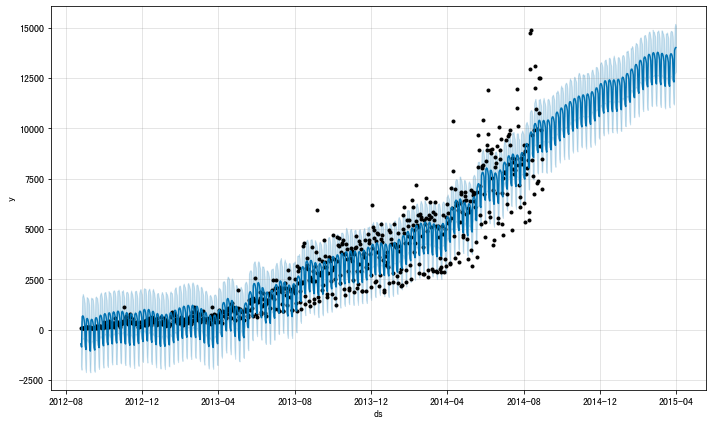

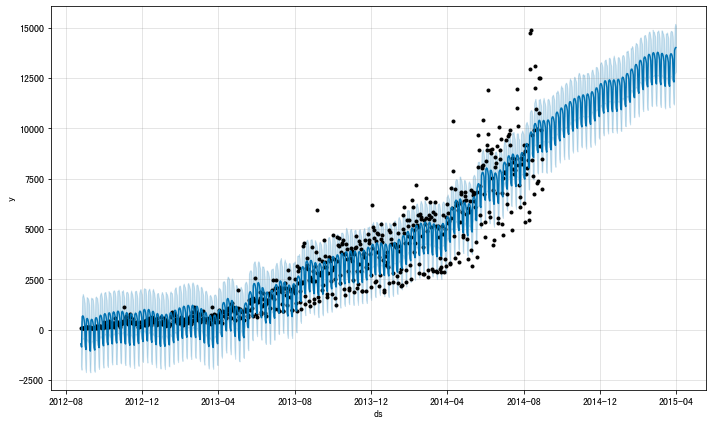

In [147]:
#print(forecaset)
model.plot(forecaset)

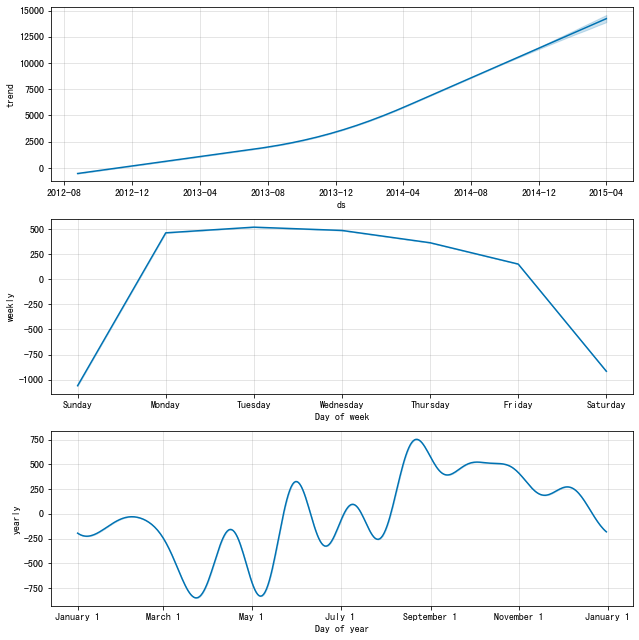

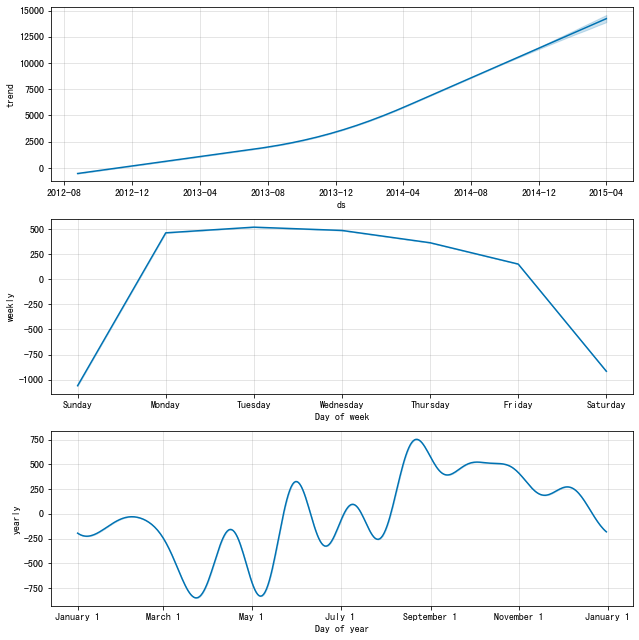

In [148]:
model.plot_components(forecaset)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


                   ds   y  floor
Datetime                        
2012-08-25 2012-08-25  76      0
2012-08-26 2012-08-26  88      0
2012-08-27 2012-08-27  62      0
2012-08-28 2012-08-28  58      0
2012-08-29 2012-08-29  60      0


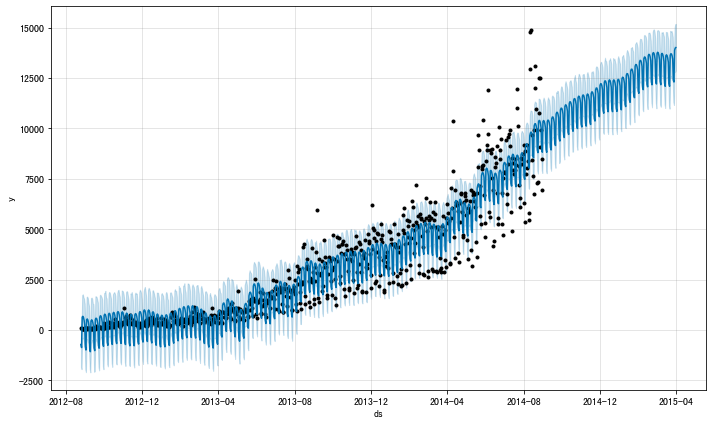

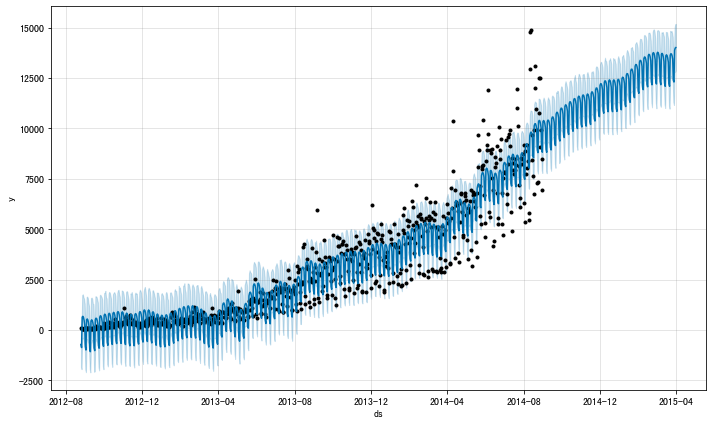

In [149]:
#人流量不可能小于0
daily_train2=daily_train
daily_train2['floor']=0
print(daily_train2.head())
model2=Prophet(weekly_seasonality='auto',seasonality_prior_scale=0.1)
model2=model2.fit(daily_train2)
future2=model2.make_future_dataframe(periods=213)
forecaset2=model2.predict(future2)
model2.plot(forecaset2)

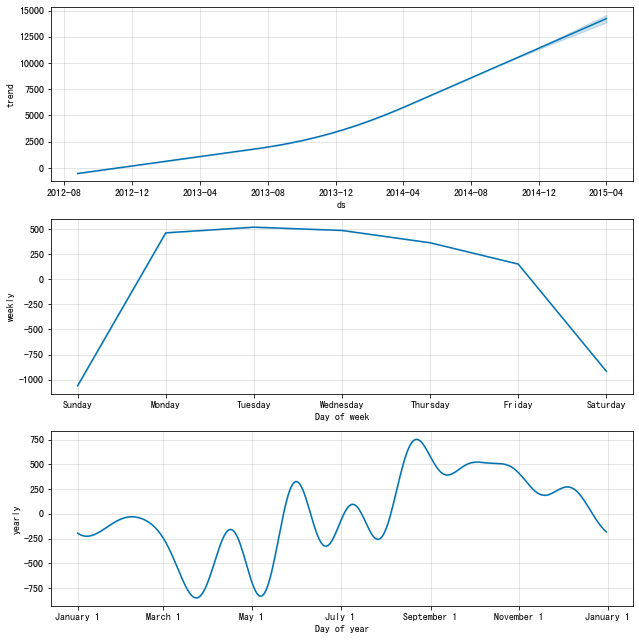

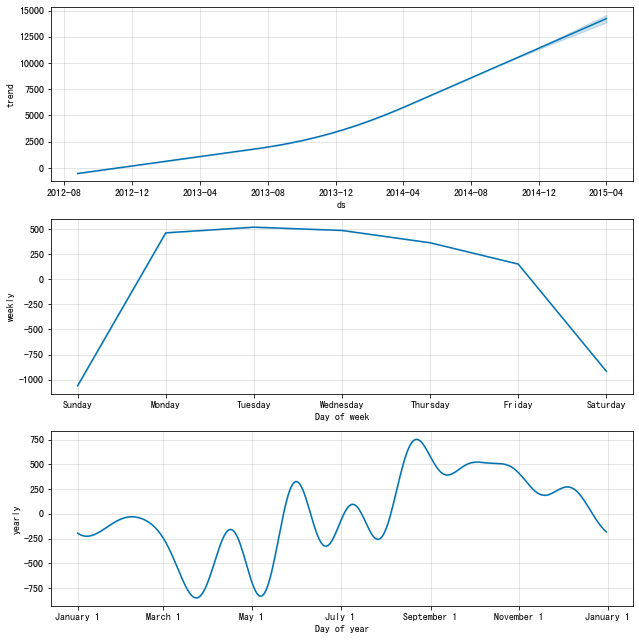

In [150]:
model2.plot_components(forecaset2)